In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Note
- If we can get the address of where the screenlines are, we can map them and highlight flows in different directions
- Problem is we can't get the address from the database, link expired
- But hey it's just 39 screenlines, it is possible to get address manually 

### Interesting Attributes
- SCREEN LINE
- DIRECTION
- TOTAL PERSONS
- TOTAL PEDESTRIANS
- TOTAL AUTO PERSONS
- TOTAL BICYCLES
- TOTAL BUS PASSENGERS
- TOTAL SUBWAY PASSENGERS
- TOTAL GO TRAIN PASSENGERS

In [62]:
# year = 1975
# time = 13
records =''
data = []
columns = []
for year in range(1975,2016):
    for time in ['13','am','pm']:
        filedir = './Toronto/cc'+str(year)+'_toronto_'+str(time)+'.csv'
        try:
            with open(filedir, 'r') as f:
                lines = f.readlines()
                columns = lines[0][:-1].split(',')
                for line in lines[1:]:
                    l = line[:-1].split(',')
                    l.append(time)
                    l.append(year)
                    data.append(l)
#                     print(l)
        except FileNotFoundError:
            pass
#             print(f'file {filedir} not found')
columns.append('TIME')
columns.append('YEAR')
records = pd.DataFrame(data, columns=columns)  
for column in columns[2:-2]:
    records[column] = pd.to_numeric(records[column], errors='coerce')
print(columns)
records.head()

['SCREEN LINE', 'DIRECTION', 'NUMBER OF STATIONS', 'TOTAL VEHICLES', 'TOTAL PERSONS', 'TOTAL AUTO', 'TOTAL AUTO PERSONS', 'TOTAL LIGHT TRUCKS', 'TOTAL TRUCKS (EXCLUDING LIGHT TRUCKS)', 'TOTAL TRANSIT', 'TOTAL TRANSIT PERSONS', 'TOTAL BUSES', 'TOTAL BUS PASSENGERS', 'TOTAL LOCAL BUSES', 'TOTAL LOCAL BUS PASSENGERS', 'TOTAL BICYCLES', 'TOTAL MOTORCYCLES', 'TOTAL SUBWAY PASSENGERS', 'TOTAL GO TRAIN PASSENGERS', 'TOTAL PEDESTRIANS', 'TIME', 'YEAR']


,SCREEN LINE,DIRECTION,NUMBER OF STATIONS,TOTAL VEHICLES,TOTAL PERSONS,TOTAL AUTO,TOTAL AUTO PERSONS,TOTAL LIGHT TRUCKS,TOTAL TRUCKS (EXCLUDING LIGHT TRUCKS),TOTAL TRANSIT,...,TOTAL BUS PASSENGERS,TOTAL LOCAL BUSES,TOTAL LOCAL BUS PASSENGERS,TOTAL BICYCLES,TOTAL MOTORCYCLES,TOTAL SUBWAY PASSENGERS,TOTAL GO TRAIN PASSENGERS,TOTAL PEDESTRIANS,TIME,YEAR
0,1001I City West Boundary (Inbound),East,17.0,164430.0,199791.0,135906.0,178212.0,12246.0,15645.0,791.0,...,14675.0,81.0,1072.0,0.0,0.0,0.0,6904.0,0.0,13,1975
1,1001O City West Boundary (Outbound),West,17.0,166359.0,202906.0,136660.0,181489.0,12646.0,16358.0,829.0,...,15490.0,85.0,1418.0,0.0,0.0,0.0,5927.0,0.0,13,1975
2,1002I City North Boundary (Inbound),South,21.0,105703.0,120481.0,85290.0,112949.0,11069.0,8937.0,407.0,...,7532.0,96.0,1861.0,0.0,0.0,0.0,0.0,0.0,13,1975
3,1002O City North Boundary (Outbound),North,20.0,101060.0,115679.0,80680.0,108004.0,11366.0,8590.0,424.0,...,7675.0,103.0,2684.0,0.0,0.0,0.0,0.0,0.0,13,1975
4,1003I City East Boundary (Inbound),West,3.0,30309.0,36832.0,23688.0,32077.0,2985.0,3541.0,230.0,...,2412.0,0.0,0.0,0.0,0.0,0.0,2343.0,0.0,13,1975


In [63]:
slID = []
bound =[]
for screenline in records['SCREEN LINE']:
    slID.append(screenline[:4])
    bound.append(screenline[4])
records['SCREENLINE ID'] = slID
records['BOUND'] = bound
records.head()

,SCREEN LINE,DIRECTION,NUMBER OF STATIONS,TOTAL VEHICLES,TOTAL PERSONS,TOTAL AUTO,TOTAL AUTO PERSONS,TOTAL LIGHT TRUCKS,TOTAL TRUCKS (EXCLUDING LIGHT TRUCKS),TOTAL TRANSIT,...,TOTAL LOCAL BUS PASSENGERS,TOTAL BICYCLES,TOTAL MOTORCYCLES,TOTAL SUBWAY PASSENGERS,TOTAL GO TRAIN PASSENGERS,TOTAL PEDESTRIANS,TIME,YEAR,SCREENLINE ID,BOUND
0,1001I City West Boundary (Inbound),East,17.0,164430.0,199791.0,135906.0,178212.0,12246.0,15645.0,791.0,...,1072.0,0.0,0.0,0.0,6904.0,0.0,13,1975,1001,I
1,1001O City West Boundary (Outbound),West,17.0,166359.0,202906.0,136660.0,181489.0,12646.0,16358.0,829.0,...,1418.0,0.0,0.0,0.0,5927.0,0.0,13,1975,1001,O
2,1002I City North Boundary (Inbound),South,21.0,105703.0,120481.0,85290.0,112949.0,11069.0,8937.0,407.0,...,1861.0,0.0,0.0,0.0,0.0,0.0,13,1975,1002,I
3,1002O City North Boundary (Outbound),North,20.0,101060.0,115679.0,80680.0,108004.0,11366.0,8590.0,424.0,...,2684.0,0.0,0.0,0.0,0.0,0.0,13,1975,1002,O
4,1003I City East Boundary (Inbound),West,3.0,30309.0,36832.0,23688.0,32077.0,2985.0,3541.0,230.0,...,0.0,0.0,0.0,0.0,2343.0,0.0,13,1975,1003,I


In [180]:
for key in (records.groupby('SCREEN LINE').groups.keys()):
    print(key)

1001I City West Boundary (Inbound)
1001I City West Boundary (Peel-Toronto Boundary) (Inbound)
1001O City West Boundary (Outbound)
1001O City West Boundary (Peel-Toronto Boundary) (Outbound)
1002I City North Boundary (Inbound)
1002I City North Boundary (York-Toronto Boundary) (Inbound)
1002O City North Boundary (Outbound)
1002O City North Boundary (York-Toronto Boundary) (Outbound)
1003I City East Boundary (Durham-Toronto Boundary) (Inbound)
1003I City East Boundary (Inbound)
1003O City East Boundary (Durham-Toronto Boundary) (Outbound)
1003O City East Boundary (Outbound)
1004I Humber River (Inbound)
1004O Humber River (Outbound)
1005I CNR Newmarket Subdivision (Inbound)
1005O CNR Newmarket Subdivision (Outbound)
1006I CNR Bala Subdivision (Inbound)
1006O CNR Bala Subdivision (Outbound)
1007I CNR Uxbridge Subdivision (Inbound)
1007O CNR Uxbridge Subdivision (Outbound)
1008I Eglinton Avenue-Humber River to CNR Uxbridge Subdivision (Inbound)
1008O Eglinton Avenue-Humber River to CNR Uxbri

Some screenline has the same ID but different names, this is caused by different measure time (varied by am, pm and 13)

**Conclusion**: Screenlines can be represented by the first 4 digits

In [93]:
IDgroup_keys = records.groupby('SCREENLINE ID').groups.keys()
IDgroup = records.groupby('SCREENLINE ID').groups
ID_BoundGroup = records.groupby(['SCREENLINE ID', 'BOUND'])
print(len(IDgroup_keys))
print(IDgroup_keys)
sl1071I = records.groupby(['SCREENLINE ID', 'BOUND']).get_group(('1071','I'))
sl = sl1071I['SCREEN LINE'].unique()
print(sl1071I[sl1071I['SCREEN LINE']==sl[0]].YEAR.unique())
print(sl1071I[sl1071I['SCREEN LINE']==sl[1]].YEAR.unique())
sl
sl1071I[sl1071I['YEAR'] == 1995]

39
dict_keys(['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1031', '1035', '1058', '1059', '1061', '1062', '1065', '1066', '1070', '1071', '1072', '1081', '1082', '1083', '1084', '1085', '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1806', '1856'])
[1975 1977 1979 1981 1983 1985 1987 1989 1991 1993 1995 1998 2001 2004
 2006 2009 2011]
[1981 1995]


,SCREEN LINE,DIRECTION,NUMBER OF STATIONS,TOTAL VEHICLES,TOTAL PERSONS,TOTAL AUTO,TOTAL AUTO PERSONS,TOTAL LIGHT TRUCKS,TOTAL TRUCKS (EXCLUDING LIGHT TRUCKS),TOTAL TRANSIT,...,TOTAL LOCAL BUS PASSENGERS,TOTAL BICYCLES,TOTAL MOTORCYCLES,TOTAL SUBWAY PASSENGERS,TOTAL GO TRAIN PASSENGERS,TOTAL PEDESTRIANS,TIME,YEAR,SCREENLINE ID,BOUND
2312,1071I Suburban North Boundary (Hwy 401 South) ...,East/South,23.0,399339.0,541249.0,351861.0,423319.0,31070.0,12331.0,6779.0,...,30853.0,838.0,0.0,65342.0,3554.0,0.0,13,1995,1071,I
2386,1071I Suburban North Boundary (Hwy 401 South) ...,East/South,23.0,95168.0,143510.0,83983.0,96887.0,7314.0,2734.0,1763.0,...,9275.0,170.0,0.0,28230.0,3554.0,0.0,am,1995,1071,I
2460,1071I Suburban North Boundary (Highway 401 Sou...,East/South,21.0,102898.0,140935.0,93213.0,114521.0,6736.0,1950.0,1773.0,...,9013.0,270.0,0.0,14004.0,0.0,0.0,pm,1995,1071,I


This just confirmed the conclusion

In [102]:
maxSingleYearRec = 0
for id in IDgroup:
    for b in ['I','O']:
        group = ID_BoundGroup.get_group((id, b))
        years = group.YEAR.unique()
        for yr in years:
            recSize = len(group[group.YEAR==yr])
            if maxSingleYearRec < recSize:
                maxSingleYearRec = recSize
maxSingleYearRec

3

### Usually more commute in pm peak hours than am peak

In [179]:
yearTime_group = records.loc[:,['YEAR','TIME','TOTAL PERSONS']].groupby(['YEAR','TIME']).groups
np.average(yearTime_group[(1975, '13')])
# yearTime_group

38.5

In [174]:
times = ['am','pm','13']
# yearTime_group
avgTotalPerson = {}
for time in times:
    avgTotalPerson[time] = []
    years = records['YEAR'].unique()
    for yr in years:
        avg = np.average(yearTime_group[(yr,time)])
        avgTotalPerson[time].append(avg)


18
18
18
18


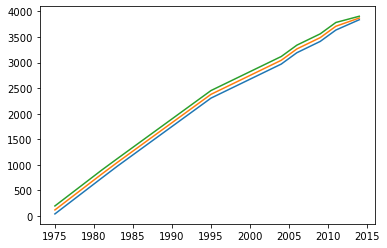

In [177]:
plt.plot(years, avgTotalPerson['13'])
plt.plot(years, avgTotalPerson['am'])
plt.plot(years, avgTotalPerson['pm'])

In [193]:
rand_road = records.groupby(['SCREENLINE ID']).get_group('1006')
# rand_road
rand_road

,SCREEN LINE,DIRECTION,NUMBER OF STATIONS,TOTAL VEHICLES,TOTAL PERSONS,TOTAL AUTO,TOTAL AUTO PERSONS,TOTAL LIGHT TRUCKS,TOTAL TRUCKS (EXCLUDING LIGHT TRUCKS),TOTAL TRANSIT,...,TOTAL LOCAL BUS PASSENGERS,TOTAL BICYCLES,TOTAL MOTORCYCLES,TOTAL SUBWAY PASSENGERS,TOTAL GO TRAIN PASSENGERS,TOTAL PEDESTRIANS,TIME,YEAR,SCREENLINE ID,BOUND
10,1006I CNR Bala Subdivision (Inbound),North/South/West,27.0,279655.0,433838.0,234542.0,303385.0,23698.0,18620.0,4122.0,...,47535.0,0.0,0.0,70321.0,4848.0,0.0,13,1975,1006,I
11,1006O CNR Bala Subdivision (Outbound),East/North/South,27.0,267816.0,412260.0,223735.0,285442.0,22634.0,18624.0,4117.0,...,48260.0,0.0,0.0,65047.0,3757.0,0.0,13,1975,1006,O
88,1006I CNR Bala Subdivision (Inbound),North/South/West,27.0,74815.0,144009.0,66079.0,84413.0,4977.0,3030.0,1096.0,...,20000.0,0.0,0.0,34412.0,3823.0,0.0,am,1975,1006,I
89,1006O CNR Bala Subdivision (Outbound),East/North/South,27.0,51331.0,69063.0,43628.0,51464.0,4093.0,2950.0,976.0,...,8148.0,0.0,0.0,7739.0,44.0,0.0,am,1975,1006,O
166,1006I CNR Bala Subdivision (Inbound),North/South/West,27.0,73916.0,110333.0,63170.0,81959.0,5795.0,4102.0,1238.0,...,11673.0,0.0,0.0,14278.0,419.0,0.0,pm,1975,1006,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,1006O CNR Bala Subdivision (Outbound),East/North/South,16.0,175981.0,310533.0,155701.0,185194.0,10423.0,6162.0,1591.0,...,890.0,2104.0,9.0,66307.0,31900.0,2823.0,13,2014,1006,O
3864,1006I CNR Bala Subdivision (Inbound),North/South/West,16.0,47693.0,125613.0,42450.0,49237.0,2847.0,1301.0,412.0,...,297.0,683.0,8.0,37907.0,28459.0,468.0,am,2014,1006,I
3865,1006O CNR Bala Subdivision (Outbound),East/North/South,16.0,35071.0,50710.0,30590.0,35697.0,2590.0,1317.0,350.0,...,246.0,224.0,9.0,9146.0,457.0,273.0,am,2014,1006,O
3898,1006I CNR Bala Subdivision (Inbound),North/South/West,16.0,44793.0,75417.0,39255.0,46525.0,2599.0,1914.0,532.0,...,323.0,493.0,8.0,19643.0,1209.0,799.0,pm,2014,1006,I


### Looking at a random screenline, looks like ther's more commute in pm peak hours

<BarContainer object of 18 artists>

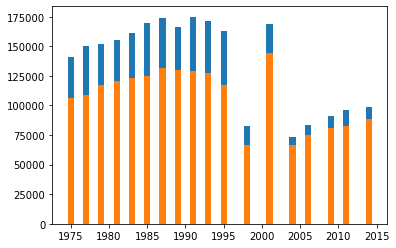

In [214]:
plt.bar(rand_road[rand_road.TIME=='pm'].YEAR.unique(), rand_road[rand_road.TIME=='pm'].groupby('YEAR').mean()['TOTAL PERSONS'])
plt.bar(rand_road[rand_road.TIME=='am'].YEAR.unique(), rand_road[rand_road.TIME=='am'].groupby('YEAR').mean()['TOTAL PERSONS'])

#### Commenting things out